<a href="https://colab.research.google.com/github/bhawana-khajuria/R-Programming/blob/main/R_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Q1. Create a file that contains 1000 lines of random strings.**

In [57]:
import random
import string

# **Function to generate a random string of fixed length**


In [58]:
def generate_random_string(length=10):
    letters = string.ascii_letters  # a-zA-Z
    return ''.join(random.choice(letters) for _ in range(length))

# **File path**

In [59]:
file_name = "random_strings.txt"

# **Create file and write 1000 lines**

In [60]:
with open(file_name, 'w') as f:
    for _ in range(1000):
        random_str = generate_random_string(12)  # 12-character random string
        f.write(random_str + '\n')

print(f"File '{file_name}' with 1000 random strings created successfully.")

File 'random_strings.txt' with 1000 random strings created successfully.


# **Q2. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]**

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Seed for reproducibility**

In [62]:
np.random.seed(42)

# **(i) Create dataset of 100x30 with values in [1, 200]**

In [63]:
data = np.random.randint(1, 201, size=(100, 30))
df = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(30)])

## **Replace values in range [10, 60] with NA**

In [64]:
df = df.mask(df.apply(lambda x: x.between(10, 60)))

## **Count rows with missing values**

In [65]:
rows_with_na = df.isnull().any(axis=1).sum()
print(f"(i) Rows with missing values: {rows_with_na}\n")

(i) Rows with missing values: 100



 ## **(ii) Replace NA with column mean**

In [66]:
df_filled = df.fillna(df.mean(numeric_only=True))
print(f"(ii) Null values after filling: {df_filled.isnull().sum().sum()}\n")

(ii) Null values after filling: 0



## **(iii) Pearson correlation matrix**

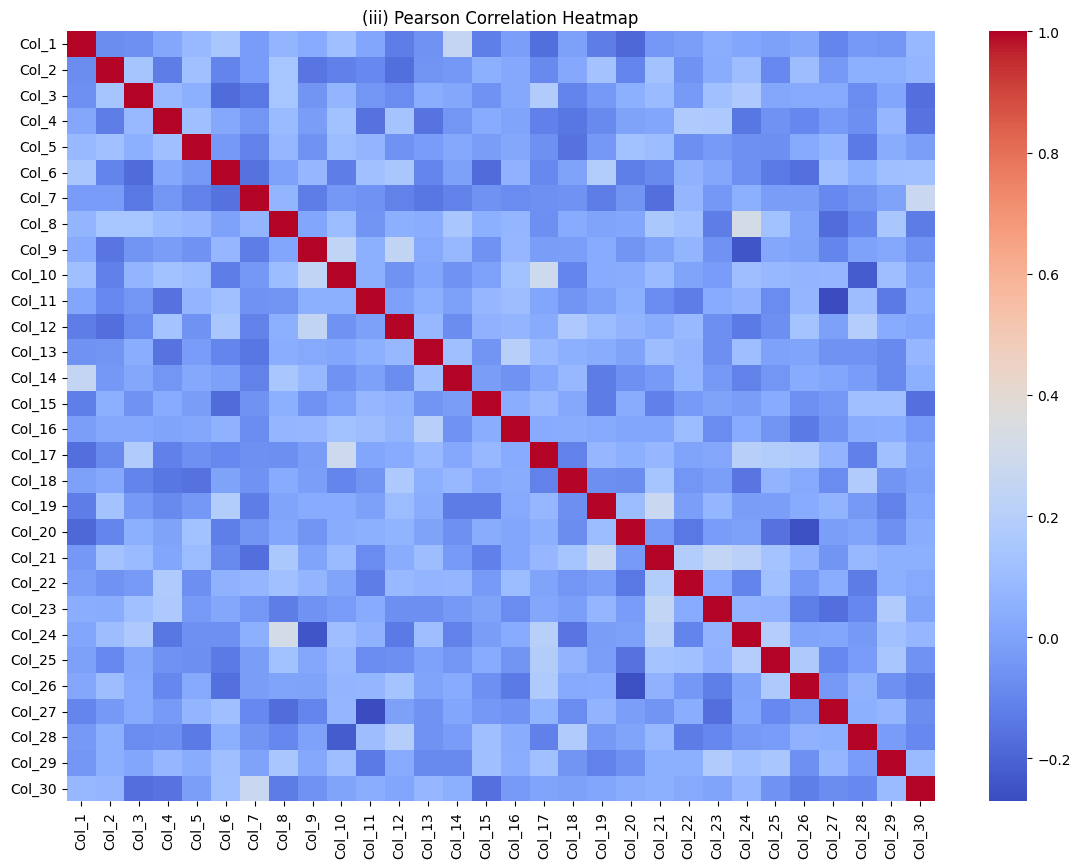

In [67]:
correlation_matrix = df_filled.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("(iii) Pearson Correlation Heatmap")
plt.show()

## **Columns with correlation <= 0.7 with all others**

In [68]:
low_corr_cols = correlation_matrix.columns[(correlation_matrix.abs() <= 0.7).all()]
print(f"(iii) Columns with correlation <= 0.7:\n{list(low_corr_cols)}\n")

(iii) Columns with correlation <= 0.7:
[]



# **(iv) Normalize all values between 0 and 10**

In [69]:
df_normalized = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min()) * 10
print("(iv) Normalization complete. Range of values:")
print(df_normalized.describe().loc[['min', 'max']], '\n')

(iv) Normalization complete. Range of values:
     Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  Col_10  \
min    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
max   10.0   10.0   10.0   10.0   10.0   10.0   10.0   10.0   10.0    10.0   

     ...  Col_21  Col_22  Col_23  Col_24  Col_25  Col_26  Col_27  Col_28  \
min  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max  ...    10.0    10.0    10.0    10.0    10.0    10.0    10.0    10.0   

     Col_29  Col_30  
min     0.0     0.0  
max    10.0    10.0  

[2 rows x 30 columns] 



# **(v) Replace all values with 1 if <= 0.5, else 0**

In [70]:
df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)
print("(v) Binary conversion complete. Sample:")
print(df_binary.head())


(v) Binary conversion complete. Sample:
   Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  Col_10  ...  \
0      0      0      0      0      0      0      0      0      0       0  ...   
1      0      0      0      0      0      0      0      0      0       0  ...   
2      0      0      0      0      0      1      0      0      0       0  ...   
3      0      0      0      0      0      0      0      0      0       0  ...   
4      0      0      0      0      0      0      0      0      0       0  ...   

   Col_21  Col_22  Col_23  Col_24  Col_25  Col_26  Col_27  Col_28  Col_29  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       1       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       1       0   
4       0       0       0       0       0       0       0       0       0   

   Col_30 

/tmp/ipython-input-70-1850562159.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)


# **Q3: Clustering on Custom Dataset (Step-by-Step)**

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Set seed for reproducibility
np.random.seed(42)

# Create dataset with specified ranges
col_1_4 = np.random.uniform(-10, 10, (500, 4))
col_5_8 = np.random.uniform(10, 20, (500, 4))
col_9_10 = np.random.uniform(-100, 100, (500, 2))

# Combine into one dataset
data = np.hstack((col_1_4, col_5_8, col_9_10))
df = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(10)])

# Normalize features before clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# **(i) K-Means Clustering + Elbow Method**

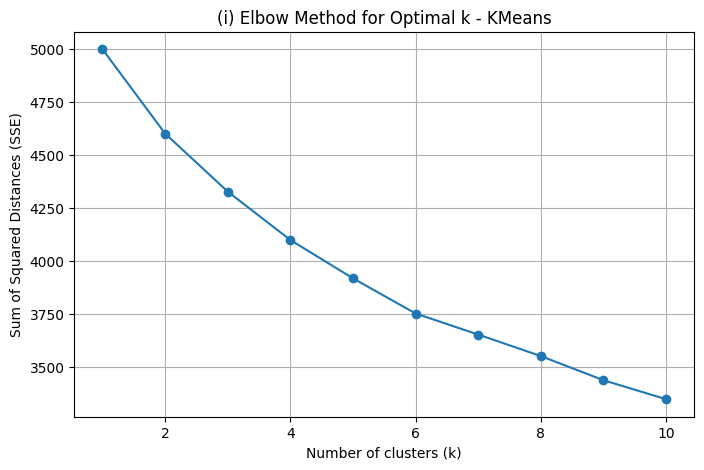

In [72]:
# Elbow method to find optimal k
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)  # sum of squared distances

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('(i) Elbow Method for Optimal k - KMeans')
plt.grid(True)
plt.show()

# Apply KMeans with optimal k (e.g., 3)
kmeans_optimal = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans_optimal.fit_predict(data_scaled)

# **(ii) Hierarchical Clustering + Dendrogram**

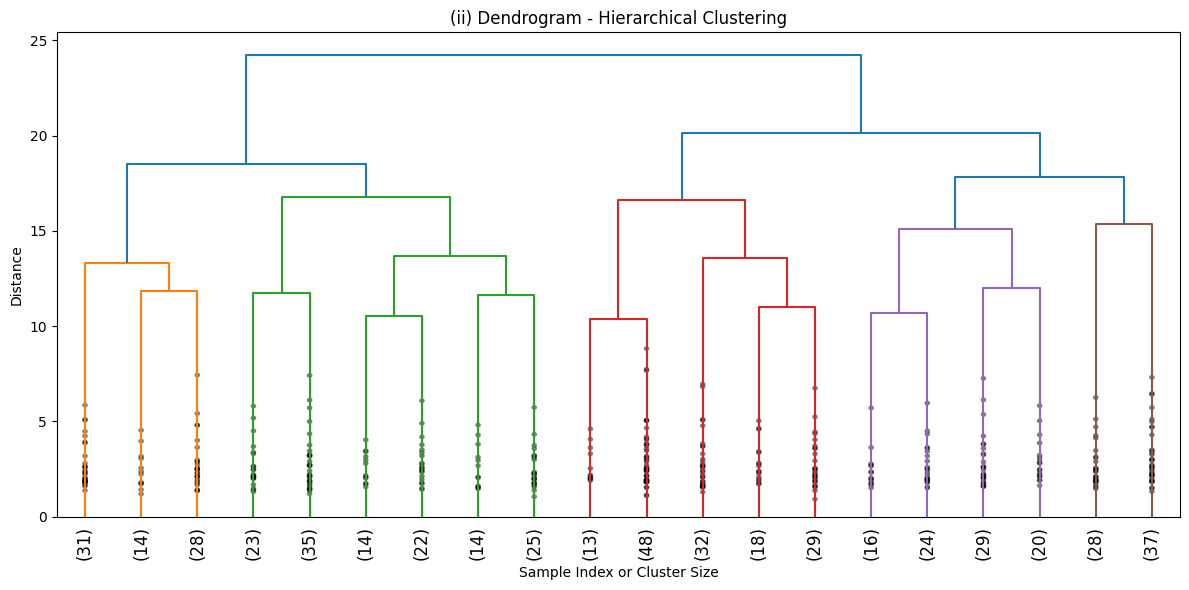

In [73]:
# Generate linkage matrix for hierarchical clustering
linkage_matrix = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('(ii) Dendrogram - Hierarchical Clustering')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Form clusters from dendrogram - example: 3 clusters
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust')

# **Visualize Clusters (using PCA for 2D)**

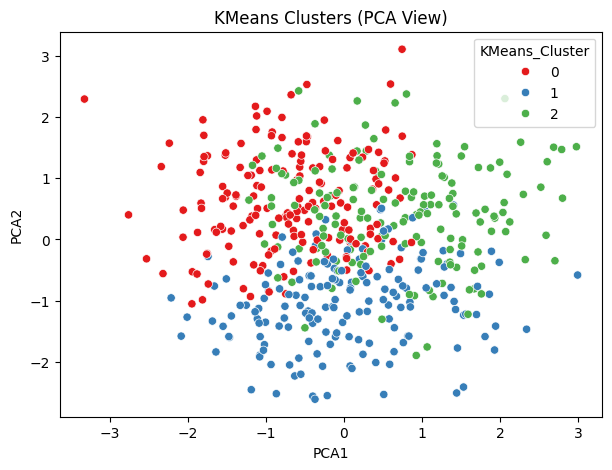

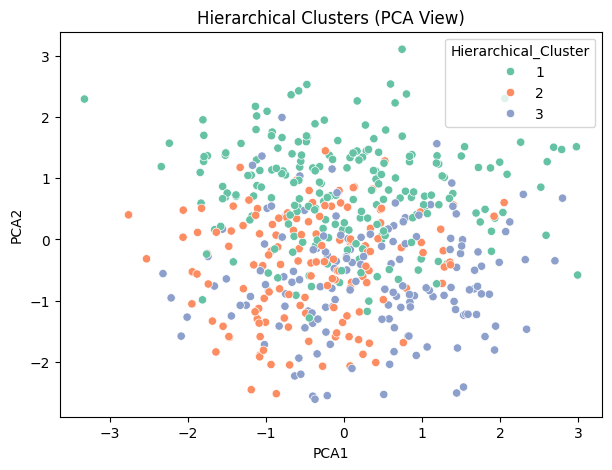

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

# KMeans cluster plot
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='Set1')
plt.title('KMeans Clusters (PCA View)')
plt.show()

# Hierarchical cluster plot
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Hierarchical_Cluster', palette='Set2')
plt.title('Hierarchical Clusters (PCA View)')
plt.show()

# **Q4: Code for Dataset & Plots**

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)


# Create dataset of 600x15 with values in [-100, 100]
data = np.random.uniform(-100, 100, size=(600, 15))
df = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(15)])



## **(i) Scatter plot between Column 5 and Column 6**

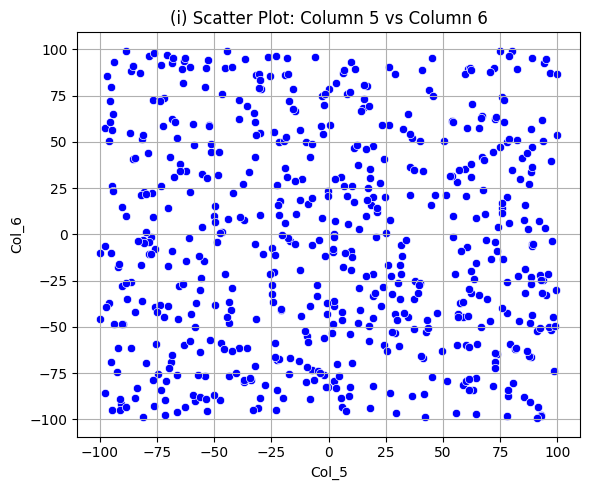

In [76]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df['Col_5'], y=df['Col_6'], color='blue')
plt.title('(i) Scatter Plot: Column 5 vs Column 6')
plt.xlabel('Col_5')
plt.ylabel('Col_6')
plt.grid(True)
plt.tight_layout()
plt.show()

****

## **(ii) Histogram of all columns in one figure**

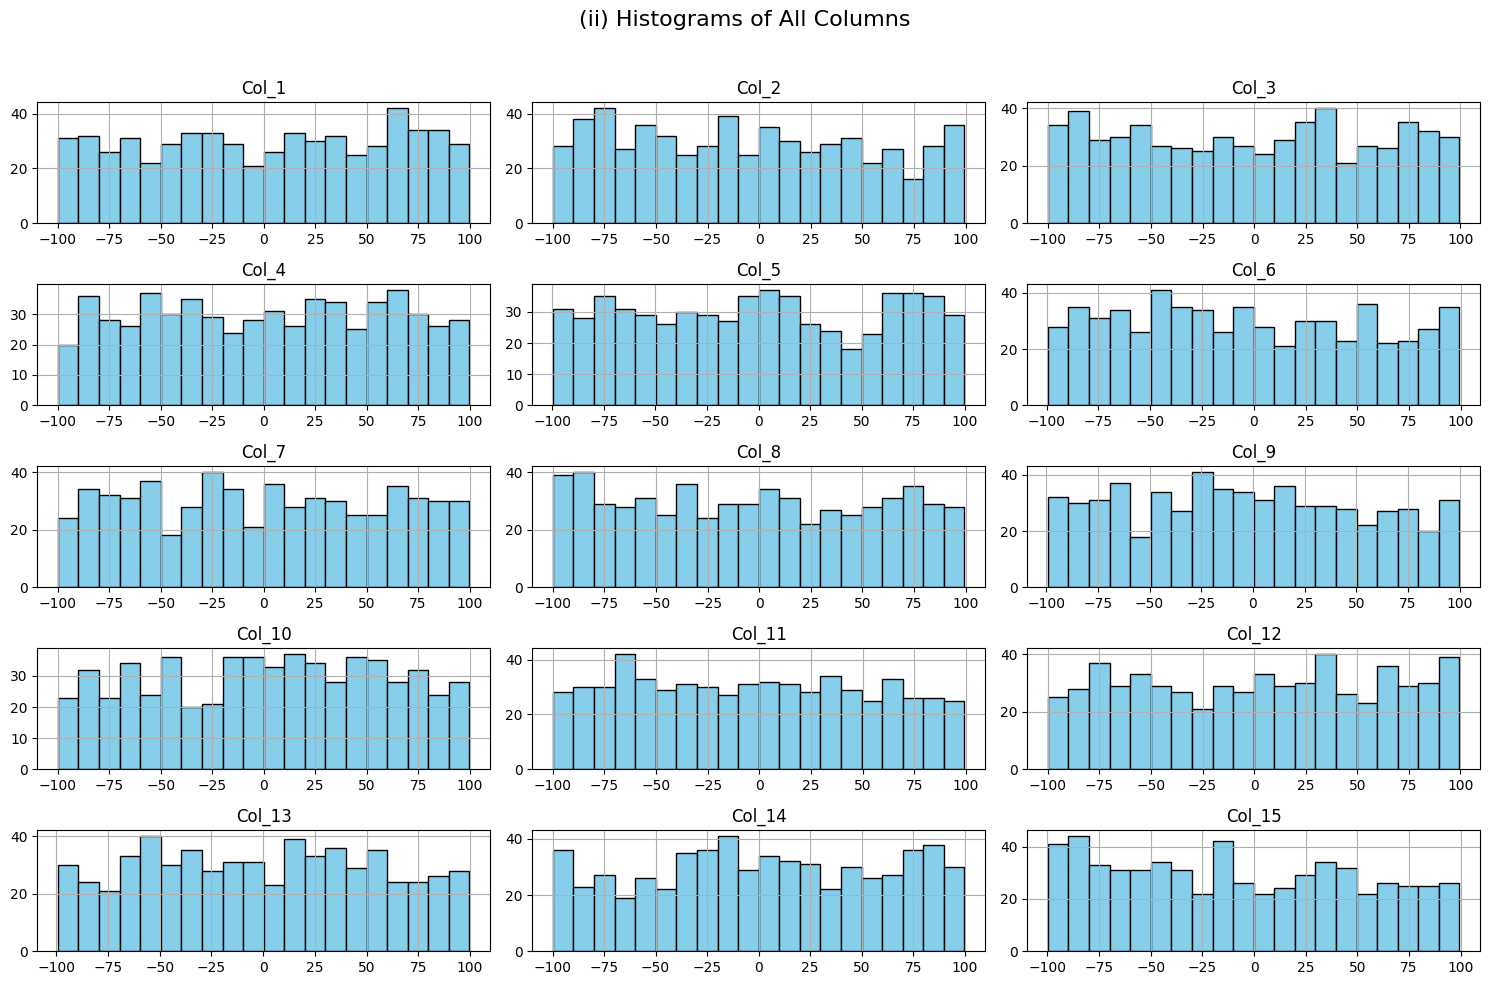

In [77]:
df.hist(bins=20, figsize=(15, 10), grid=True, layout=(5, 3), color='skyblue', edgecolor='black')
plt.suptitle('(ii) Histograms of All Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## **(iii) Boxplot of all columns in one figure**

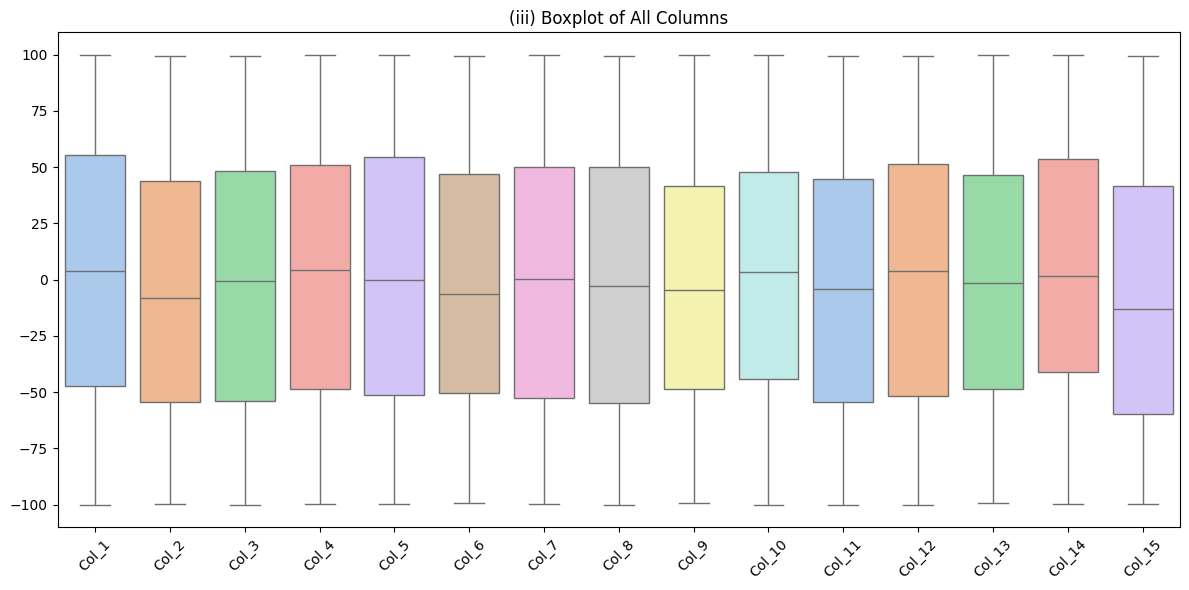

In [78]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette='pastel')
plt.title('(iii) Boxplot of All Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q5. Create a random dataset of 500 rows and 5 columns:
All the values are defined between [5,10].**
Perform the following operations:

(i) Perform t-Test on each column.

(ii) Perform Wilcoxon Signed Rank Test on each column.

(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [79]:
import numpy as np
import pandas as pd
from scipy import stats

## **Step 1: Create random dataset of 500 rows and 5 columns with values between [5, 10]**

In [80]:
np.random.seed(0)
data = np.random.uniform(5, 10, size=(500, 5))
df = pd.DataFrame(data, columns=[f'Column_{i+1}' for i in range(5)])

## **Step 2(i): One Sample t-Test on each column (against population mean = 7.5 as example)**

In [81]:
print("=== One-Sample t-Test (H0: mean = 7.5) ===")
for col in df.columns:
    t_stat, p_value = stats.ttest_1samp(df[col], popmean=7.5)
    print(f"{col}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

=== One-Sample t-Test (H0: mean = 7.5) ===
Column_1: t-stat = -0.1335, p-value = 0.8939
Column_2: t-stat = -0.3594, p-value = 0.7195
Column_3: t-stat = -2.0182, p-value = 0.0441
Column_4: t-stat = 1.1691, p-value = 0.2429
Column_5: t-stat = 2.5444, p-value = 0.0112


## **2(ii): Wilcoxon Signed-Rank Test on each column (against median = 7.5)**
**Wilcoxon needs differences from a constant, and cannot handle ties or 0s well**

In [82]:
print("\n=== Wilcoxon Signed-Rank Test (H0: median = 7.5) ===")
for col in df.columns:
    try:
        # subtract 7.5 to test against median = 7.5
        stat, p = stats.wilcoxon(df[col] - 7.5)
        print(f"{col}: statistic = {stat:.4f}, p-value = {p:.4f}")
    except ValueError as e:
        print(f"{col}: Error - {e}")


=== Wilcoxon Signed-Rank Test (H0: median = 7.5) ===
Column_1: statistic = 62140.0000, p-value = 0.8807
Column_2: statistic = 61478.0000, p-value = 0.7227
Column_3: statistic = 55964.0000, p-value = 0.0393
Column_4: statistic = 58828.0000, p-value = 0.2401
Column_5: statistic = 54431.0000, p-value = 0.0112


## **Step 2(iii): Two Sample t-Test and Wilcoxon Rank Sum Test (Mann-Whitney U)**

In [83]:
col3 = df['Column_3']
col4 = df['Column_4']

print("\n=== Two-Sample t-Test (Column 3 vs Column 4) ===")
t_stat, p_value = stats.ttest_ind(col3, col4, equal_var=False)
print(f"t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

print("\n=== Wilcoxon Rank Sum Test (Mann-Whitney U Test) (Column 3 vs Column 4) ===")
u_stat, p_value = stats.mannwhitneyu(col3, col4, alternative='two-sided')
print(f"U-statistic = {u_stat:.4f}, p-value = {p_value:.4f}")


=== Two-Sample t-Test (Column 3 vs Column 4) ===
t-stat = -2.2471, p-value = 0.0249

=== Wilcoxon Rank Sum Test (Mann-Whitney U Test) (Column 3 vs Column 4) ===
U-statistic = 115120.0000, p-value = 0.0305
